## **Homework 7 Fitting**

#### MWM Shakir
#### D/ENG/21/0108/EE

Question 1

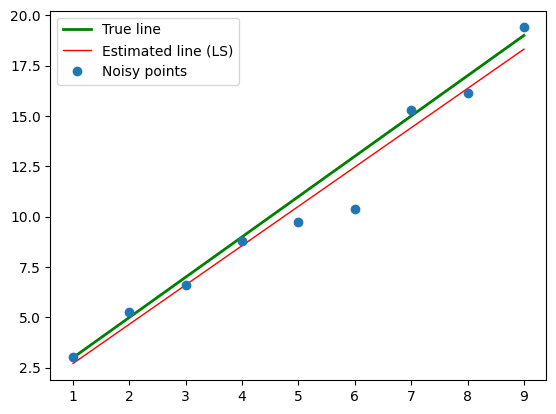

In [11]:

# Least-squares line fitting
import numpy as np
import matplotlib.pyplot as plt

# Genrating the true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
no = np.random.randn(len(x)) #Noise
o = np.zeros(x.shape)

# o[1] = 20 #outliers

y = m*x + c + no + o

n = len(x)

X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (LS)')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')
plt.show()

#### Question 2

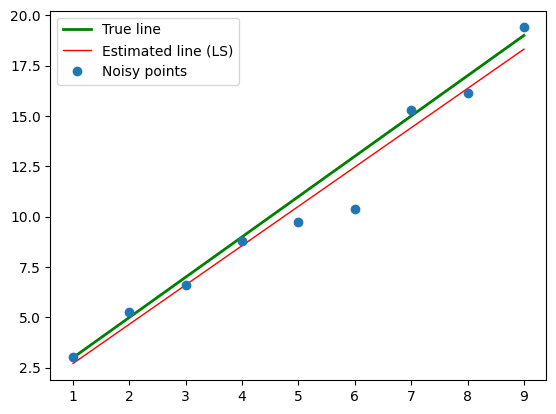

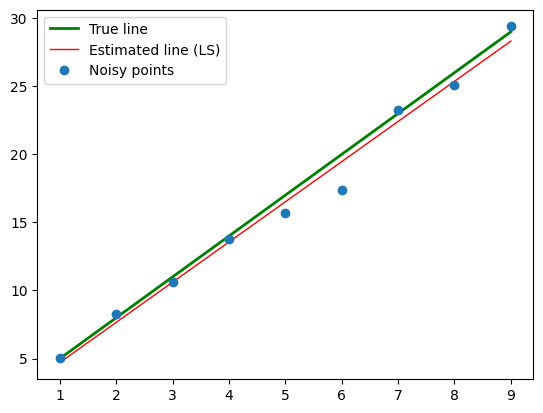

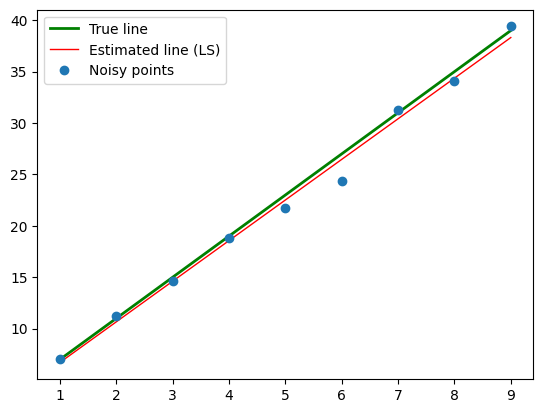

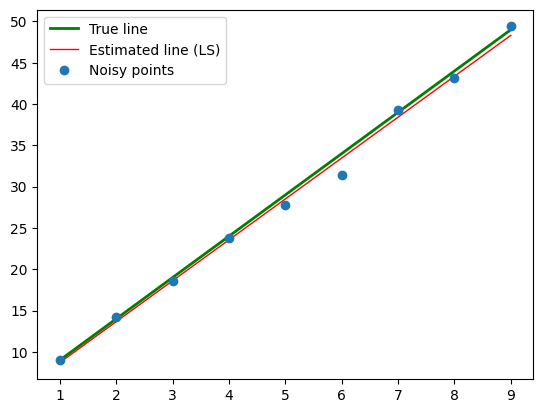

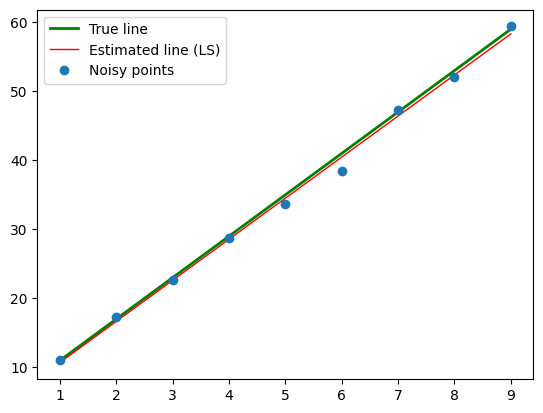

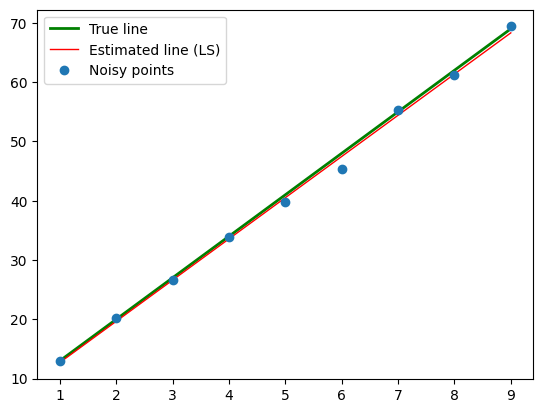

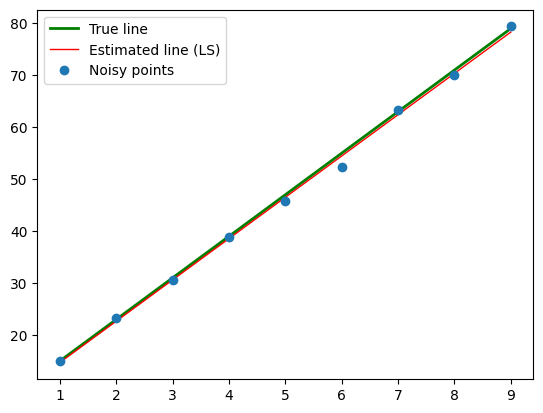

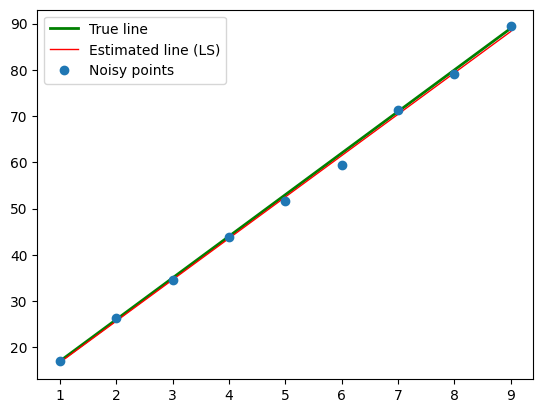

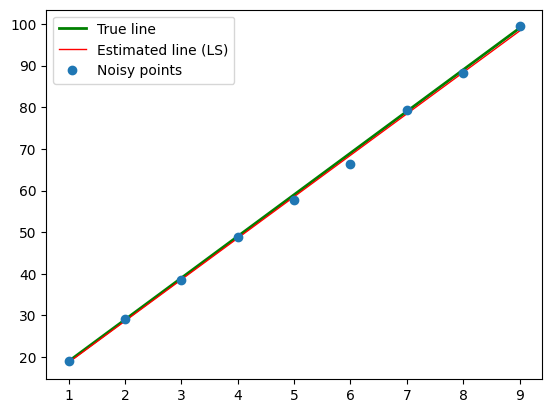

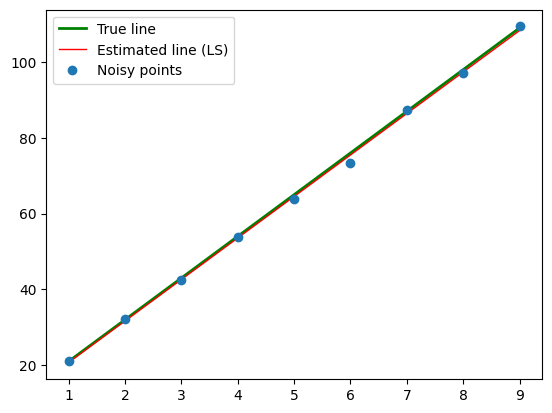

In [5]:

# Least-squares line fitting
import numpy as np
import matplotlib.pyplot as plt
i = 0

while i < 10:
    # Genrating the true line y = m*x + c
    m = 2+i # gradient 
    c = 1+i # intercept
    x = np.arange(1,10, 1)
    np.random.seed(45)
    no = np.random.randn(len(x)) #Noise
    o = np.zeros(x.shape)

    # o[1] = 20

    y = m*x + c + no + o

    n = len(x)

    X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
    B = np.linalg.pinv(X.T @ X) @ X.T @ y
    mstar = B[0]
    cstar = B[1]

    plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
    plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (LS)')
    plt.plot(x,y, 'o', label='Noisy points')
    plt.legend(loc='best')
    plt.show()

    i = i + 1






The estimated line gets close to the true line as the values of **m** and **c** varies

#### Question 3

Intercept: 0.4680280300716593
Slope: 0.9912707377986842


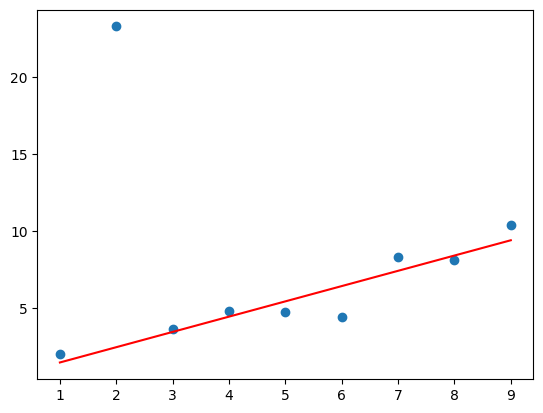

In [12]:
from sklearn.linear_model import RANSACRegressor
import numpy as np
import matplotlib.pyplot as plt

c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
no = np.random.randn(len(x)) #Noise
o = np.zeros(x.shape)
o[1] = 20 #outliers

X = x[:, np.newaxis] # Convert x to a 2D array
y = c + x + no + o # Generate the response variable

ransac = RANSACRegressor()
ransac.fit(X, y)

print("Intercept:", ransac.estimator_.intercept_)
print("Slope:", ransac.estimator_.coef_[0])

# Generate a set of x values over the range of the data
x_fit = np.linspace(x.min(), x.max(), 100)[:, np.newaxis]

# Use RANSAC to predict y values for the x_fit values
y_fit = ransac.predict(x_fit)

# Plot the original data and the RANSAC line
plt.scatter(x, y)
plt.plot(x_fit, y_fit, color='r')
plt.show()


Question 4

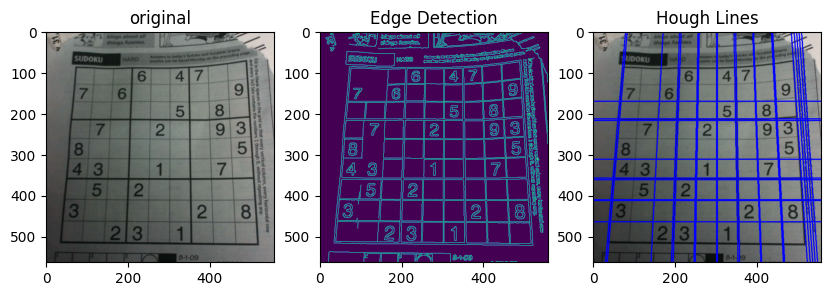

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('Images/sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2BGRA)
# Apply edge detection
edges = cv.Canny(gray, 50, 150, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho

    x1 = int(x0 + 1000*(-b))

    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(im, (x1,y1), (x2,y2), (0,0,255), 2)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(gray)
ax[0].set_title("original")
ax[2].imshow(im)
ax[2].set_title("Hough Lines")
ax[1].imshow(edges)
ax[1].set_title("Edge Detection")
plt.show()



Question 5

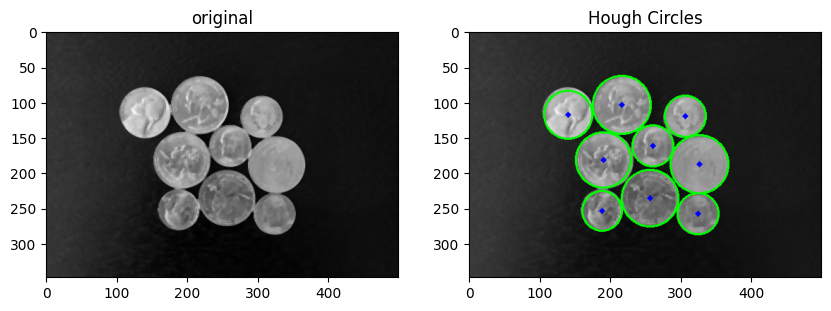

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('images/coins.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=180,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original")
ax[1].imshow(cimg)
ax[1].set_title("Hough Circles")
plt.show()

Question 6

C:\Users\shaki\AppData\Local\Temp\ipykernel_12180\1402356706.py:33: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


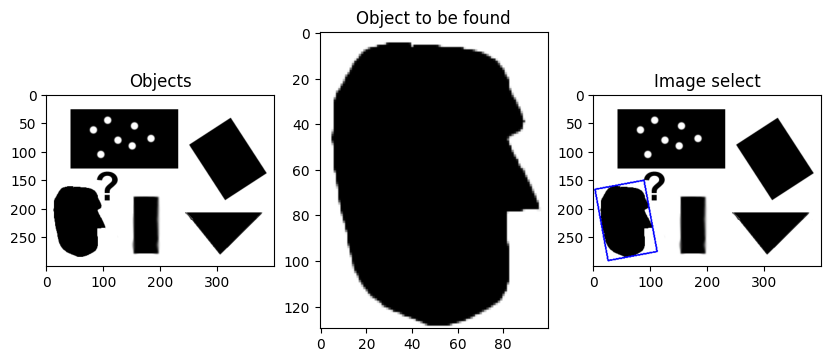

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Load the input image and the template
img = cv.imread('Images/pic1.png')
template = cv.imread('Images/templ.png')
# Convert to grayscale and threshold the images

# Convert to grayscale and threshold the images
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

thresh_img = cv.Canny(gray_img, 50, 150, apertureSize = 3)
thresh_template = cv.Canny(gray_template, 50, 150, apertureSize = 3)
# Find the contours of the template and the input image
contours_template, _ = cv.findContours(thresh_template, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_img, _ = cv.findContours(thresh_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Match the contours
best_match = None
min_score = np.inf
for c1 in contours_template:
    for c2 in contours_img:
        score = cv.matchShapes(c1, c2, cv.CONTOURS_MATCH_I2, 0)
        if score < min_score:
            min_score = score
            best_match = c2

# Draw the object
if best_match is not None:
    rect = cv.minAreaRect(best_match)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img, [box], 0, (0, 0, 255), 2)

# Display the result
fig, ax = plt.subplots(1,3, figsize = (10,20))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Objects")
ax[1].imshow(gray_template, cmap="gray")
ax[1].set_title("Object to be found")
ax[2].imshow(img, cmap="gray")
ax[2].set_title("Image select")
plt.show()
